In [1]:
import cira 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from os.path import exists

cira.auth.KEY_FILE = "../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

SYMBOL = "ETH/USD" # MDRX is shortable 
SYM_HIST_FILE = f'./{SYMBOL.replace("/", "_")}.csv'

stk = cira.Stock(SYMBOL)

if not exists(SYM_HIST_FILE): # chacheing historical data  
    start = datetime(2015, 5, 1)
    end = datetime(2024, 5, 1)
    stk.save_historical_data(SYM_HIST_FILE, start, end)

data = stk.load_historical_data(SYM_HIST_FILE)
data.head()

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2021-01-01 06:00:00+00:00,ETH/USD,742.15,745.00,716.65,733.65,6534.81013,6514.0,731.807780
2021-01-02 06:00:00+00:00,ETH/USD,735.29,791.08,725.44,786.88,16071.74933,15214.0,769.787732
2021-01-03 06:00:00+00:00,ETH/USD,786.64,1098.00,784.55,1086.86,44039.92386,43031.0,942.620484
2021-01-04 06:00:00+00:00,ETH/USD,1086.86,1169.05,880.00,991.40,50778.44556,51353.0,1030.893782
2021-01-05 06:00:00+00:00,ETH/USD,992.00,1138.00,980.08,1105.56,25283.79028,26369.0,1073.661942


<Axes: xlabel='timestamp'>

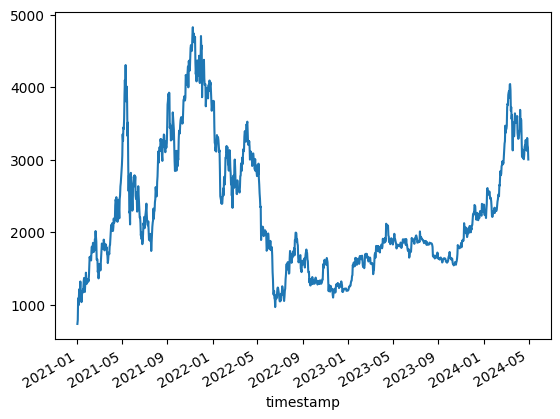

In [2]:
data["close"].plot()

## Labeling 

<Axes: xlabel='timestamp'>

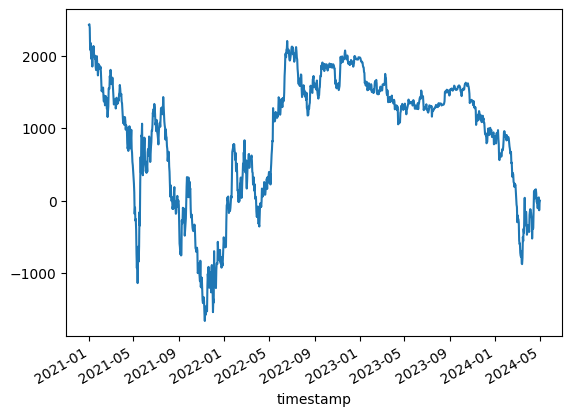

In [3]:
data["retrun"] = data["open"].values[-1] - data["open"]
data["retrun"].plot()

In [16]:
data.drop(columns=["symbol"], inplace=True)
data.head()

,open,high,low,close,volume,trade_count,vwap,retrun
timestamp,,,,,,,,
2021-01-01 06:00:00+00:00,742.15,745.00,716.65,733.65,6534.81013,6514.0,731.807780,2426.90
2021-01-02 06:00:00+00:00,735.29,791.08,725.44,786.88,16071.74933,15214.0,769.787732,2433.76
2021-01-03 06:00:00+00:00,786.64,1098.00,784.55,1086.86,44039.92386,43031.0,942.620484,2382.41
2021-01-04 06:00:00+00:00,1086.86,1169.05,880.00,991.40,50778.44556,51353.0,1030.893782,2082.19
2021-01-05 06:00:00+00:00,992.00,1138.00,980.08,1105.56,25283.79028,26369.0,1073.661942,2177.05


In [17]:
split_prc = 0.8
train_data = data.iloc[:int(len(data)*split_prc)]
test_data =  data.iloc[int(len(data)*split_prc):]
print(len(data), len(train_data), len(test_data))
assert len(data) == len(train_data) + len(test_data)

1216 972 244


## make model

In [18]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [19]:
model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [21]:
X_train = train_data.drop(columns=["retrun"], inplace=False)
y_train = train_data["retrun"].to_frame()

X_test = test_data.drop(columns=["retrun"], inplace=False)
y_test = test_data["retrun"].to_frame()

In [20]:
model.fit(X_train.values, y_train.values)

/home/axel/Programs/repositories/cira-examples/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [23]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test.values)
mse = mean_squared_error(y_test.values, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 526360.293268548
